In [1]:
print('jo')

jo


In [2]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
#feature engineering
geography=pd.get_dummies(dataset['Geography'],drop_first=True)
gender=pd.get_dummies(dataset['Gender'],drop_first=True)

In [8]:
x=x.drop(['Gender','Geography'],axis=1)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
#now concat as we have removed those stuff
x=pd.concat([x,geography,gender],axis=1)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y,random_state=0,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
#now creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,ELU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout

In [18]:
classifier=Sequential()

In [19]:
#adding input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.2))

In [20]:
#adding hidden layer-1
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [21]:
#adding hidden layer-2
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [22]:
#adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.add(Dropout(0.2))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
#we can keep optimizer=opt

In [25]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100


536/536 [==============================] - 2s 2ms/step - loss: 1.0904 - accuracy: 0.7182 - val_loss: 0.4818 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.9900 - accuracy: 0.7938 - val_loss: 0.4669 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 1.0518 - accuracy: 0.7959 - val_loss: 0.4568 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.9990 - accuracy: 0.7960 - val_loss: 0.4518 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 1.0214 - accuracy: 0.7959 - val_loss: 0.4504 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.9242 - accuracy: 0.7959 - val_loss: 0.4464 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.9516 - accuracy: 0.7962 - val_loss: 0.4421 - val_accuracy: 0.79

536/536 [==============================] - 1s 3ms/step - loss: 0.8965 - accuracy: 0.8280 - val_loss: 0.3873 - val_accuracy: 0.7955
Epoch 55/100
536/536 [==============================] - 1s 2ms/step - loss: 1.0101 - accuracy: 0.8313 - val_loss: 0.3886 - val_accuracy: 0.7955
Epoch 56/100
536/536 [==============================] - 1s 2ms/step - loss: 0.9089 - accuracy: 0.8283 - val_loss: 0.3888 - val_accuracy: 0.7955
Epoch 57/100
536/536 [==============================] - 1s 2ms/step - loss: 0.8444 - accuracy: 0.8349 - val_loss: 0.3911 - val_accuracy: 0.7955
Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.8713 - accuracy: 0.8354 - val_loss: 0.3899 - val_accuracy: 0.7955
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.9395 - accuracy: 0.8350 - val_loss: 0.3880 - val_accuracy: 0.7955
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.9838 - accuracy: 0.8322 - val_loss: 0.3893 - val_accuracy: 0.7955
Epoch

In [26]:
#Early stopping-when accuracy is not at all increasing automatically the training will stop.below stuff taken
# from keras documentation.From this we can know how many epochs is needed.
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [27]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.9599 - accuracy: 0.8287 - val_loss: 0.3829 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.9251 - accuracy: 0.8317 - val_loss: 0.3823 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.9083 - accuracy: 0.8321 - val_loss: 0.3815 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.9686 - accuracy: 0.8388 - val_loss: 0.3831 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.9951 - accuracy: 0.8377 - val_loss: 0.3833 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 1.0014 - accuracy: 0.8369 - val_loss: 0.3822 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.9284 - accuracy: 0.8356 - val_loss: 0.3823 - val_accuracy:

536/536 [==============================] - 1s 2ms/step - loss: 0.9336 - accuracy: 0.8423 - val_loss: 0.3835 - val_accuracy: 0.7955
Epoch 58/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.9728 - accuracy: 0.8352 - val_loss: 0.3825 - val_accuracy: 0.7955
Epoch 59/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.8952 - accuracy: 0.8388 - val_loss: 0.3823 - val_accuracy: 0.7955
Epoch 59: early stopping


In [28]:
#see in the above early stopping gor excected and model stopped training
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

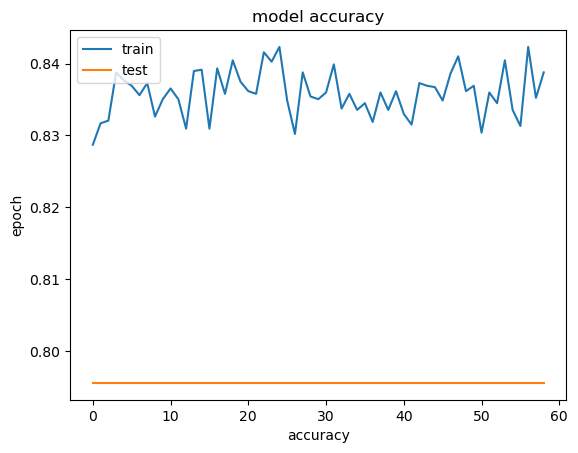

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

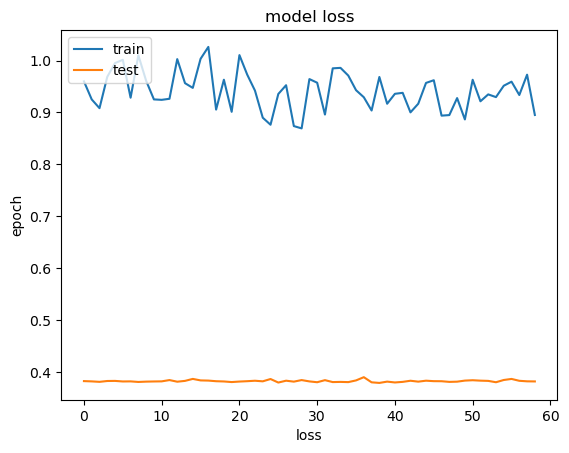

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [31]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 972us/step


In [32]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [33]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975

In [34]:
#get the weights
classifier.get_weights()

[array([[-6.47796914e-02,  8.34508240e-02, -1.13501854e-01,
          1.39375320e-02,  5.52276820e-02, -1.65859699e-01,
         -1.07422872e-02,  2.17465982e-01, -2.80383050e-01,
          1.88997179e-01,  1.97135597e-01],
        [ 6.45021975e-01,  7.45554566e-02, -6.92202270e-01,
         -6.93646133e-01,  1.93547592e-01,  2.45620802e-01,
          2.64681697e-01,  2.75624037e-01, -7.31448352e-01,
         -8.46428037e-01, -4.92901474e-01],
        [ 2.55254507e-02,  3.19501042e-01, -1.02380708e-01,
          5.41749820e-02,  9.63243395e-02, -1.07798696e-01,
          1.56743992e-02,  1.08182795e-01,  1.67237371e-01,
          3.30871739e-03,  2.82532652e-04],
        [-6.83672130e-02, -3.82273465e-01, -3.62568289e-01,
         -3.08266103e-01, -9.20477033e-01, -7.40940452e-01,
          1.48847565e-01, -5.67502081e-01,  2.32701778e-01,
         -3.40992063e-01, -5.62833786e-01],
        [-1.09879568e-01, -1.29551113e-01,  9.27423611e-02,
          7.00818226e-02, -1.07756400e+00, -

In [35]:
from tensorflow.keras.models import save_model, load_model
import pickle

# Assuming 'model_history' is the history object returned by classifier.fit
# and 'model_history.model' is your TensorFlow/Keras model

# Save the model
model_history.model.save('model_tf.h5')

# Save the model history using pickle
with open('model_history.pkl', 'wb') as file:
    pickle.dump(model_history.history, file)

# Load the model
loaded_model_tf = load_model('model_tf.h5')

# Load the model history using pickle
with open('model_history.pkl', 'rb') as file:
    loaded_model_history = pickle.load(file)

C:\Users\somna\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
loaded_model = load_model('model_tf.h5')
loaded_model